# Linear Regression
Linear Regression is a useful tool for predicting quantitative response. Let's understand Linear Regression with the help of an example. 

## Example: Advertising Budget

In [1]:
#Importing the libraries
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn")
import numpy as np
import pandas as pd

In [2]:
#Importing the dataset
advertising = pd.read_csv("data/Advertising.csv")
#Looking at the first few rows
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### How to think about our problem?
The advertising dataset displays `sales` (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for `TV`, `radio`, and `newspaper` media. Let's suppose that our job is to suggest, _on the basis of this data_, a marketing plan for next year that will result in high product sales. 

What information would be useful in order to provide such a recommendation? Here are a few important questions that we might seek to address:

1. _`Is there a relationship between advertising budget and sales?`_ <br>
Our first goal should be to determine whether the data provides any evidence of an association between _advertising_ expenditure and _sales_. If the evidence is weak, then one might argue that no money should be spent on _advertising_. 

2. _`How strong is the relationship between advertising budget and sales?`_ <br>
Assuming that there is a relationship between _advertising_ and _sales_, we would like to know the strength of this relationship. In other words, given a certain _advertising_ budget, can we predict _sales_ with a high level of accuracy? This would be a _strong_ relationship. Or is a prediction of _sales_ based on _advertising_ expenditure only slightly better than a random guess? This would be a _weak_ relationship.

3. _`Which media controbute to sales?`_ <br>
Do all three media&mdash;_TV_, _radio_, and _newspaper_&mdash;contribute to _sales_, or do just one or two of the media contribute? To answer this question, we must find a way to separate out the individual effects of each medium when we have spent money on all three media.

4. _`How accurately can we estimate the effect of each medium on sales?`_ <br>
For every dollar spent on _advertising_ in a particular medium, by what amount will _sales_ increase? How accurately can we predict this amount of increase?
5. _`How accurately can we predict future sales?`_ <br>
For any given level of _TV_, _radio_, or _newspaper_ _advertising_, what is our prediction for _sales_, and what is the accuracy of this prediction. 

6. _`Is the relationship linear?`_ <br>
If there is approximately a straight-line relationship between _advertising_ expenditure ain the various media and _sales_, then linear regression is an appropriate tool. If not, then it may still be possible to transform the predictor or the response so that linear regression can be used.

7. _`Is there synergy among the adveritising media?`_ <br>
Perhaps spending \$50,000 on _TV advertising_ and \$50,000 on _radio advertising_ results in more _sales_ then allocating \$100,000 to either _TV_ or _radio_ individually. In marketing, this is known as the synergy effect, while in statistics it is called an interaction effect.


One simple way to explore our the relationship between our predictors and response variable is to plot them on a graph. If we plot the individual data points&mdash;predictors on the $x-axis$ and response on the $y-axis$&mdash;one-by-one on a graph, we will get a scatter plot.

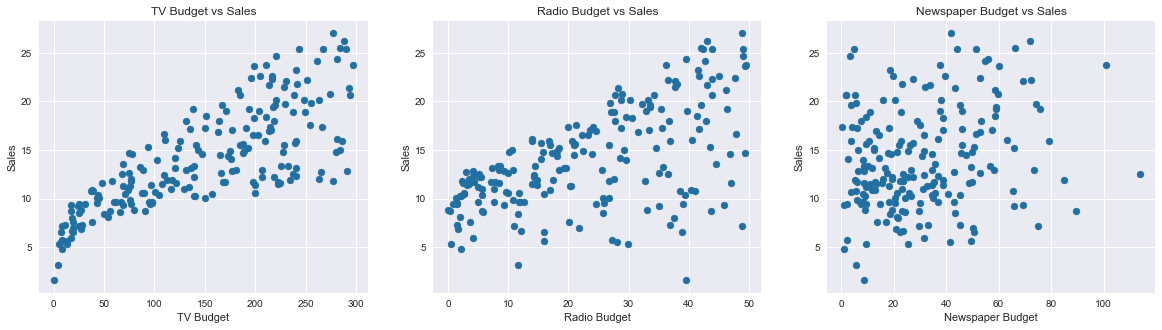

In [3]:
#Plot
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=False)
f.set_size_inches(h=5,w=20)
ax1.scatter(advertising['TV'],advertising['sales'], color = "#226FA1")
ax1.set_title("TV Budget vs Sales")
ax1.set_xlabel("TV Budget")
ax1.set_ylabel("Sales")
ax2.scatter(advertising['radio'],advertising['sales'], color = "#226FA1")
ax2.set_title("Radio Budget vs Sales")
ax2.set_xlabel("Radio Budget")
ax2.set_ylabel("Sales")
ax3.scatter(advertising['newspaper'],advertising['sales'], color = "#226FA1")
ax3.set_title("Newspaper Budget vs Sales")
ax3.set_xlabel("Newspaper Budget")
ax3.set_ylabel("Sales")
plt.show()

- We can see a _strong_ positive linear relationship between TV advertising budget and sales.
- We see a positive linear relationship, but not as strong as TV-sales, for radio advertising budget and sales.
- The newspaper advertising budget and sales relationship seems somewhat scattered.

Already, by plotting our data on a simple graph, we have been able to identify some relationships between our data.

### Ordinary Least Squares
Linear Regression is a very straightforward approach for predicting a quantitative response $Y$ on the basis of a predictor variables $x_1,x_2,x_3,...,x_n$. It assumes that there is approximately a linear relationship between X and Y.

Mathematically, we can write this linear relationship as 
$$Y \approx \beta_0 + \beta_1 X + \epsilon$$

Here, $X$ for now represents a vector of the predictor variable(s), for example: _TV_ advertising budget and $Y$ represents _sales_. We can regress our _sales_ onto _TV_ budget by fitting the model:

$$ sales \ \approx \beta_0 + \beta_1 \times TV + \epsilon$$

$\beta_0$ and $\beta_1$ are two unknown constants that represent the _intercept_ and _slope_ terms in the linear model. Together, $\beta_0$ and $\beta_1$ are known as the model **coefficients** or **parameters**. $\epsilon$ is the term for the _irreducible error_. It helps account for whatever part of the dependent variable cannot be predicted by the independent variables in the observed data.

The _intercept_ term is the expected mean value of $Y$ when all $X = 0$. 
>It is often defined as the mean of the dependent variable when all independent variables are set to 0.

If all $X$ is 0 and there is no intercept term, then $Y = 0$, which is incorrect. With the intercept term being there, if all $X = 0$ then our prediction for $Y$ is the mean of $Y$. Furthermore, if we dont include the constant intercept term in our regression model, then we are actually setting the constant to zero. This action forces the regression line to go through the origin. In other words, a model that does not include the constant requires all of the independent variables _and_ the dependent variable to equal zero simultaneously. 

If $X$ is never equal to $0$, then we have no interest in the intercept term. It doesn't tell us anything about $Y$. However, we will still need it to predict $Y$. If there is no constant, then our regression model will exhibit bias without the constant. Here's an example:

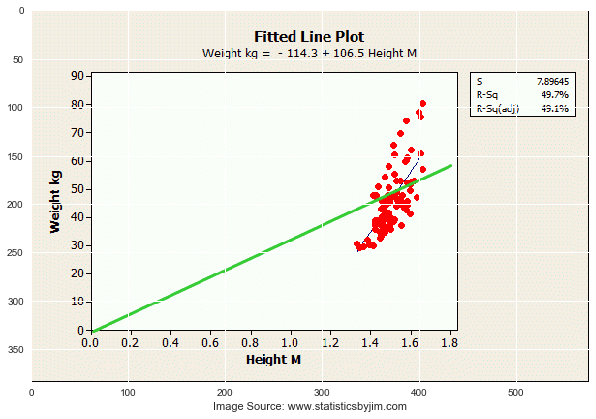

In [4]:
example = plt.imread("images/flp_no_constant.gif")
plt.figure(figsize=(10,10))
plt.imshow(example)
plt.xlabel("Image Source: www.statisticsbyjim.com")
plt.show()

As we can see in this sample plot of weight as a function of height, the green regression line is a poor fit for the data. It's slope is completely incorrect, and it's fitted values are biased.

### Estimating the Coefficients
In practice, $\beta_0$ and $\beta_1$ are unknown. To make predictions, we must use data to esimate the coefficients. We want to find an intercept $\beta_0$ and a slope $\beta_1$ such that the resulting line is as close as possible to the data points in the data set. The most common approach involves minimizing the _least squares criterion_ and is known as **Ordinary Least Squares (OLS)**.

Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$, be the prediction for $Y$ based on the $i^{th}$ value of $X$. Then $e_i = y_i - \hat{y_i}$ represents the $i^{th}$ _residual_&mdash;the difference between the $i^{th}$ observed response value and the $i^{th}$ response value that is predicted by our linear model. We then take out the _residual sum of squares_ as :

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$

The residual sum of squares (RSS) is what we call a **cost function**. The _cost funtion_ is used to identify how good our prediction for a certain sample or a set of samples actually is when compared with the correct classifications. The goal of any learning algorithm is to _minimize the cost function_. What is the RSS? It is the sum of the squared differences between the actual value of our dependent variable, $y$ (in this case, _sales_) and the value our learning algorithm predicts $\hat{y}$. Which means that we would want the difference between the actual value and the predicted value to be as less as possible.

The aim of the least squares method is to minimize the RSS. Using some magical calculus (which unfortunately, is beyond the scope of this session but you can check out the __[full derivation here](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)__), we can show that the minimizers are:

$$\hat{\beta_1} = {{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}\over{\sum_{i=1}^n(x_i-\bar{x})^2}}$$

$$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$$

where, $\bar{y} = {1\over{n}} \sum_{i=1}^n y_i$ and $\bar{x} = {1\over{n}} \sum_{i=1}^n x_i$, or the mean of y and X.

Let's break down the two terms in the coefficient formula for a bit more insight.
- The denominator &mdash; ${\sum_{i=1}^n(x_i-\bar{x})^2}$ &mdash; is the **variance** of the dataset. variance is the average of the squared differences from the mean. It measures how far a set of numbers (observations) are spread out from the average value. Along with standard deviation and other descriptives, variance is an important statistical tool to understand the 'spread' of our data.
- The numerator &mdash; ${\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}$ &mdash; is the **covariance** between our independent variable(s) and our dependent variable. The covariance of two groups of numbers describes how those numbers change together. Covariance is a generalization of **correlation**. Correlation describes the relationship between two groups of numbers, whereas covariance describes how those numbers change with respect to each other. Hence, it lies between -1 and +1. Covariance is unbounded.



In [5]:
#Let's write the code to do this    
def estimate_coefficients(X,y):
    '''
    Arguments:
        X -- numpy array of independent variables with dimensions (n, m)
            n - number of samples in the dataset
            m - number of independent variables
        y -- numpy array of dependent variable with dimensions (n, 1)
            n - number of samples in the dataset
    Output:
        Regression Coefficients
    '''
    number_of_independent_variables = X.shape[1]
    #axis=0 takes the mean for each independent variable
    #keepdimes=True preserves the correct dimensions for the resulting array
    X_mean = np.mean(X, axis =0) #mean of our independent variables, 
    y_mean = np.mean(y, axis=0) #mean of our dependent variable

    variance = np.sum((X-X_mean)**2,axis=0,keepdims=True)
    covariance = np.sum((X-X_mean) * (y-y_mean),axis=0,keepdims=True)
    
    beta_1 = np.divide(covariance,variance)
    assert(beta_1.shape == (1,number_of_independent_variables))

    beta_0 = y_mean - beta_1.dot(X_mean)
    assert(beta_0.reshape(1,1).shape == (1,1))
    
    return beta_1, beta_0
    

Now let's see what kind of predictions we are getting.

In [6]:
#Converting our data from a pandas dataframe to numpy arrays for easier computation
X = advertising.iloc[:,0].values.reshape(200,1)
y = advertising.iloc[:,3].values.reshape(200,1)

#Estimating the coefficients
Beta_1, Beta_0 = estimate_coefficients(X,y)
print(f"Beta_1: {Beta_1}, \n \
Beta_0: {Beta_0}")

Beta_1: [[0.04753664]], 
 Beta_0: [7.03259355]


In [7]:
#It's time to get our predictions
def predict(X, Beta_1, Beta_0):
    '''
    Arguments:
        X -- numpy array of independent variables with dimension (n, m)
        Beta_1 -- Regression Coefficient for slope of best fit line with dimension (1,m)
        Beta_0 -- Regression Coefficient for intercept term with dimension (1,m)
    Output:
        numpy array of predictions with dimensions (n, m)
    '''
    predictions = np.array([Beta_0 + Beta_1.dot(X[i,:]) for i in range(X.shape[0])])
    return predictions

y_predicted = predict(X, Beta_1, Beta_0)
print(f"Shape of predicted values: {y_predicted.shape}")

Shape of predicted values: (200, 1)


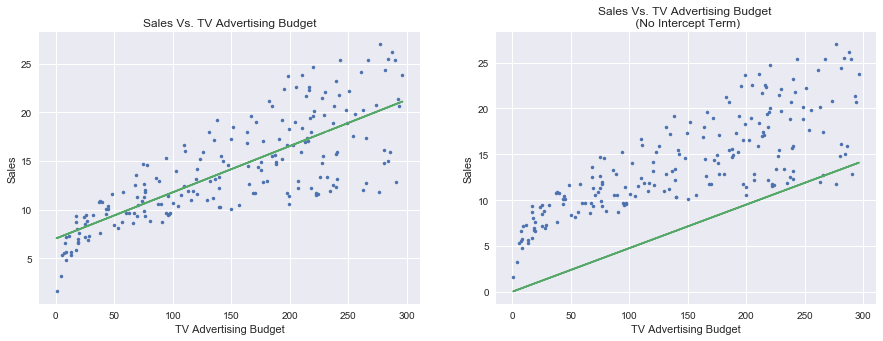

In [8]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((15,5))
ax1.plot(X, y, '.')
ax1.plot(X, y_predicted, '-')
ax1.set_title("Sales Vs. TV Advertising Budget")
ax1.set_xlabel("TV Advertising Budget")
ax1.set_ylabel("Sales")
ax2.plot(X,y,".")
ax2.plot(X,predict(X,Beta_1,0),'-')
ax2.set_title("Sales Vs. TV Advertising Budget \n (No Intercept Term)")
ax2.set_xlabel("TV Advertising Budget")
ax2.set_ylabel("Sales")
plt.show()

### Normal Equation Implementation
Let's look at our equation for the slope from the lense of linear algebra. 

$$ y = \beta_1 X$$

What happens if multiply both sides with $X^T$ (the transpose of the independent variables matrix):
$$ X^T y = \beta_1 X X^T$$ <br>
This is known as the **Normal Equation**. The normal equation _minimizes the sum of the square differences between the left and right sides_. If you remember a bit of linear algebra then you will see that we can shift the terms with our coefficient $\beta_1$ to the left and take the inverse:
$$ \beta_1 = ({X^TX})^{-1}X^Ty$$

Let's try and see what out put we get with this function to calculate $\beta_1$.

In [9]:
def estimate_coefficients_normal(X,y):
    '''
    Arguments:
        X -- numpy array of independent variables with dimensions (n, m)
            n - number of samples in the dataset
            m - number of independent variables
        y -- numpy array of dependent variable with dimensions (n, 1)
            n - number of samples in the dataset
    Output:
        Regression Coefficients
    '''
    X_ = X.copy()
    ones = np.ones((X_.shape[0],1))
    X_=np.append(X_,ones,1)
    
    beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T.dot(y))
    return beta[:-1],beta[-1]

In [10]:
#Calculating the regression coefficients
Beta_1_normal, Beta_0_normal = estimate_coefficients_normal(X,y)
print(f"Beta_1: {Beta_1},\nBeta_1_normal: {Beta_1_normal}\n\
Beta_0: {Beta_0}, \nBeta_0_normal: {Beta_0_normal}")

Beta_1: [[0.04753664]],
Beta_1_normal: [[0.04753664]]
Beta_0: [7.03259355], 
Beta_0_normal: [7.03259355]


In [11]:
def predict_normal(X, Beta_1, Beta_0):
    '''
    Arguments:
        X -- numpy array of independent variables with dimension (n, m)
        Beta_1 -- Regression Coefficient for slope of best fit line with dimension (1,m)
        Beta_0 -- Regression Coefficient for intercept term with dimension (1,m)
    Output:
        numpy array of predictions with dimensions (n, m)
    '''
    predictions = np.array([Beta_1.T.dot(X[i,:])+Beta_0 for i in range(X.shape[0])])
    return predictions

y_predicted_normal = predict_normal(X, Beta_1_normal, Beta_0_normal)


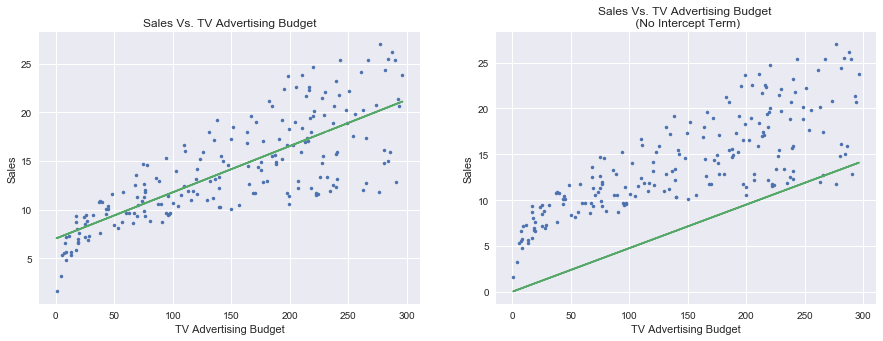

In [12]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_size_inches((15,5))
ax1.plot(X, y, '.')
ax1.plot(X, y_predicted_normal, '-')
ax1.set_title("Sales Vs. TV Advertising Budget")
ax1.set_xlabel("TV Advertising Budget")
ax1.set_ylabel("Sales")
ax2.plot(X,y,".")
ax2.plot(X,predict(X,Beta_1,0),'-')
ax2.set_title("Sales Vs. TV Advertising Budget \n (No Intercept Term)")
ax2.set_xlabel("TV Advertising Budget")
ax2.set_ylabel("Sales")
plt.show()

### Assessing the Accuracy of the Model
We would now want to quantify the extent to which the model fits the data. The quality of a linear regression fit is typically assessed using two two related quantities: the _residual standard error (RSE)_ and the $R^2$ statistic. 

#### Residual Standard Error
Associated with each of our observation is an error term $\epsilon$. Due to the presence of these error terms, even if knew the true regression line, we would not be able to perfectly predict $Y$ from $X$. The RSE is an estimate of the standard deviation of $\epsilon$. Roughly speaking, **it is the average amount that the response will deviate from the true regression line**. 

$$ RSE = \sqrt{{1\over{n-2}} RSS} = \sqrt{ {1\over{n-2}} \sum^n_{i=1}{(y_i - \hat{y_i})^2}         } $$

In [62]:
#In the case of our advertising budget dataset

#We first start by taking the residual sum of squares (RSS)
def RSS(y_predicted, y):
    '''
    Arguments:
        y_predicted -- array of predictions using the regression model
        y -- dependent variable values
    Outputs:
        Returns the residual sume of squares
    '''
    return np.sum((y_predicted_normal-y)**2, axis=0)

#We then get the residual standard error (RSE)
def RSE(RSS_, n):
    '''
    Arguments:
        RSS - residual sum of squares
        n - number of observations
    Outputs:
        returns the residual standard error
    '''
    return np.sqrt(RSS_/(n -2))

RSS_ = RSS(y_predicted, y)
RSE_ = RSE(RSS_, y.shape[0])

print(f"Residual Standard Error: {RSE_}")

Residual Standard Error: [3.25865637]


Actual sales in each market deviate from the true regression line by approximately 3,260 units, on average. Another way to think about this is that even if the model were correct and the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exactly, any prediction of sales on the basis of TV advertising would still be off by about 3,260 units on average. 

The RSE is considered a measure of the lack of fit of the model to the data. The smaller the RSE the better the fit.

#### R<sup>2</sup> Statistic
The RSE is measured in the units of $Y$, it is not always clear what constitutes a good RSE. The $R^2$ statistic provides an alternative measure of fit. It takes the form of a proportion&mdash;the proportion of variance explained&mdash;and so it always takes on a value between 0 and 1, and is independent of the scale of $Y$.

$$R^2 = {{TSS - RSS} \over TSS} = 1 - {RSS\over TSS}$$

where $TSS = \sum{(y_i - \bar{y_i})^2}$ is the total sum of squares. TSS measures the total variance in the response $Y$, and can be thought of as the _amount of variability inherent in the response **before** the regression is performed_. In contrast, RSS measures the _amount of variability that is left unexplained **after** performing the regression_. Hence, TSS-RSS measures the _amount of variability in the response that is **explained** (or removed) by performing the regression_, and $R^2$ measures the _proportion of variability in Y that can be explained using X_.

An $R^2$ statistic close to 1 indicates that a large proportion of the variability in the response has been explained by the regression. 

In [63]:
#Calculating the R^2 statistic
y_mean = np.mean(y, axis =0)

def TSS(y_mean, y):
    '''
    Arguments:
        y_mean - mean of dependent variable y
        y - dependent variable values
    Outputs:
        Returns the total sum of squares
    '''
    return np.sum((y - y_mean)**2)

TSS_ = TSS(y_mean, y)

def R2(TSS_,RSS_):
    '''
    Arguments:
        TSS - Total sum of squares
        RSS _ Residual sum of squares
    Outputs:
        Returns the R2 statistic
    '''
    return 1 - (RSS_/TSS_)

R2_ = R2(TSS_, RSS_)

print(f"R2: {R2_}")

R2: [0.61187505]


Here, the $R^2$ statistic tells us that approximately 61% of the variability in the data can be explained through the TV advertising budget.

### Assessing the Accuracy of the Coefficient Estimates
Before we go any further, let's rewind a bit so that we can understand how significant (or not) our coefficients of regression are. The true relationship between X and Y takes the form $ Y = f(X) + \epsilon$ for some unknown function $f$, where $\epsilon$ is a mean-zero random error term. If $f$ is to be approximated by linear regression, then we can write this relationship as: 
$$Y = \beta_0 + \beta_1X + \epsilon$$

Here $\beta_0$ is the intercept term&mdash;that is, the expected value of $Y$ when $X=0$, and $\beta_1$ is the slope&mdash;the average increase in $Y$ associated with a one-unit increase in $X$. The error term is a catch-all for what we miss with this simple model: the true relationship is probably not linear, there may be other variables that cause variation in Y, and there may be measurement error. We typically assume that the error term is independent of $X$ as it is accounting for things which cant be explained by $X$. 

The true relationship is generally not known for real data, but the least squares line can always be computed using the coefficient estimates. In other words, in real applications, we have access to a set of observations from which we can compute the least squares line; however, the population regression line is unobserved. 

What we need to understand here is that whatever estimation of the function behind our data we are trying to get, it will be an imperfect one. We can only estimate this function based on the data for the independent variables we have in our dataset. In real life, the function to predict the sales of a product will be much more complex than just depending on the advertising budget in different mediums. This means that every dataset which we will have might have a slightly different _observable_ function (the _true_ function is hidden from us) due to some unknown influences of other variables. Hence, our estimation on one dataset might underfit the data while our estimation of a different dataset might overfit the data. 

So does that mean our analysis is useless? Absolutely not. If we have a good set of independent variables then we can definitely approximate a certain amount of what influences the dependent variable. In fact, we can come very very close. Take for example the _sample mean_ of a sample set from a population. The sample mean will only be an approximation of the population mean. Again, depending on the data the sample mean might be an under-estimation of the population mean or an over-estimation. However, if we take the sample means from many such different datasets, and average them out. Then our now averaged sample mean should be almost exactly the same as the population mean. The intuition behind this is that we're taking the mean from many different samples from the population, and that means we're getting our dataset (the combination of all sample datasets) closr and closer to the population data.

This property holds true for our coefficients of regression as well. If we average out our coefficients taken over many different sample sets, then they should equal the true population regression coefficients.

### Standard Error
A natural question that follows is: how accurate is the sample mean $\bar{\mu}$ as an estimate of $\mu$? We have established that the average of $\bar{\mu}'s$ over many datasets will be very close to $\mu$, but that a single estimate $\bar{\mu}$ may be a substantial underestimate or overestimate of $\mu$. How far off will that single estimate of $\hat{\mu}$ be? In general, we answer this question by computing the **standard error** of $\hat{\mu}$.

$$SE(\hat{\mu})^2 = {\sigma^2\over{n}}$$

where $\sigma$ is the standard deviation of each of the realization $y_i$ of $Y$. Note: this formula holds provided that the n observations are uncorrelated.

In a similar vein, we can estimate how close $\hat{\beta_0}$ and $\hat{\beta_1}$ are to the true values of $\beta_0$ and $\beta_1$. To compute the standard errors:<br>

$$SE(\hat{\beta_0}) = {\sigma^2} \big [{{1\over{n}} + {\bar{x}^2\over{\sum_{i=1}^n(x_i- \bar{x})^2}}}\big] \ \ \ \ \ \ \ \ \ \ \ SE(\hat{\beta_1}) = {{\sigma^2}\over{\sqrt{\sum_{i=1}^n(x_i- \bar{x})^2}}}$$

where $\sigma^2 = Var(\epsilon)$. For these formulas to be strictly valid, we need to assume that the errors $\epsilon_i$ for each observation are uncorrelated with common variance $\sigma_2$. $SE(\beta_1)$ would be the same as $SE(\mu)$ if $\bar{x}$ were zero (in which case $\beta_0$ would be equal to $\bar{y}$.

In general, $\sigma_2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as the _residual standard error_, and is given by the formula $RSE = \sqrt{RSS\over{(n-2)}}$.

### Confidence Intervals
Standard errors can also be used to compute confidence intervals. A 95% confidence interval is defined as a range of values each with 95% probability, the range will contain the true unknown value of the parameter. The range is defined in terms of lower and upper limits computed from the sample of data. For linear regression, the 95% confidence interval for $\beta_1$ approximately takes the form:
$$\hat{\beta_1} \pm 2.SE(\hat{\beta_1}) $$

That is, there is approximately a 95% change that the interval:
$$ \big [ \hat{\beta_1} - 2.SE(\hat{\beta_1}), \hat{\beta_1} + 2.SE(\hat{\beta_1}) \big ] $$

will contain the true value of $\beta_1$. Similarly, a confidence interval for $\beta_0$ approximately takes the form:
$$\hat{\beta_0} \pm 2.SE(\hat{\beta_0})$$

In [70]:
#In the case of our advertising budget dataset

#We first start by taking the residual sum of squares (RSS)
# RSS_ = np.sum((y_predicted_normal-y)**2, axis=0)
RSS_ = RSS(y_predicted_normal,y)
#We then get the residual standard error (RSE)
# RSE_ = np.sqrt(RSS_/(y.shape[0] -2))
RSE_ = RSE(RSS_,y.shape[0])

#Now we take the standard errors for our coefficients
n = y.shape[0] #total number of observations
X_mean = np.mean(X, axis=0)

def B_SE(RSE_, X):
    '''
    Arguments:
        RSE_ -- Residual standard error
        X    -- Independent variables matrix
    Outputs:
        Returns the standard error for the slope and intercept
    '''
    X_mean = np.mean(X,axis=0)
    B1_SE = RSE_/np.sqrt(np.sum((X-X_mean)**2, axis=0))
    B0_SE = RSE_ * (np.sqrt((1/n) + ((X_mean**2)/(np.sum((X-X_mean)**2,axis=0)))))
    return B1_SE, B0_SE

B1_SE, B0_SE = B_SE(RSE_, X)

#Now the confidence intervals 95%
B1_CI_U = Beta_1_normal + 2*B1_SE #Upper bound
B1_CI_L = Beta_1_normal - 2*B1_SE #Lower bound

B0_CI_U = Beta_0_normal + 2*B0_SE #Upper bound
B0_CI_L = Beta_0_normal - 2*B0_SE #Lower bound

In [71]:
print(f"RSS: {RSS_}, RSE: {RSE_}, \n\
Standard Error (Slope): {B1_SE}, Standard Error (Intercept): {B0_SE}, \n\
Confidence Interval 95% (Slope): [{B1_CI_L} - {B1_CI_U}], \n\
Confidence Interval 95% (Intercept): [{B0_CI_L} - {B0_CI_U}]")

RSS: [2102.53058313], RSE: [3.25865637], 
Standard Error (Slope): [0.00269061], Standard Error (Intercept): [0.45784294], 
Confidence Interval 95% (Slope): [[[0.04215543]] - [[0.05291785]]], 
Confidence Interval 95% (Intercept): [[6.11690767] - [7.94827943]]


### Infernce
Therefore, we can conclude that in the absense of any advertising, ales will on average, fall somewhere between 6,116 and 7,948 units. Furthermore, for each $1000 increase in television advertising, there will be an average increase in sales of between 43 and 53 units.

Standard errors can also be used to perform _hypothesis tests_ on the coefficients. The most common hypothesis test involves the _null hypothesis_:

$H_0$ : There is no relationship between X and Y <br><br>
versus the _alternative hypothesis_: <br>

$H_\alpha$: There is some relationship between X and Y

Mathematically, this corresponds to testing: <br><br>
$H_0: \beta_1 = 0$
<br><br>
versus
<br><br>
$H_\alpha: \beta_1 \neq 0$

since if $\beta_1 = 1$ then the model reduced to $Y = \beta_0 + \epsilon$, and $X$ is not associated with $Y$. To test the null hypothesis, we need to determine whether $\hat{\beta_1}$, our estimate for $\beta_1$, is sufficiently far from zero that we can be confident that $\beta_1$ is non zero. How far is far enough? This depends on the accuracy of $\hat{\beta_1}$&mdash;that is, it depends on $SE(\hat{\beta_1})$. If $SE(\hat{\beta_1})$ is small, then even relatively small values for $\hat{\beta_1}$ may provide strong evidence that $\beta_1 \neq 0$, and hence that there is a relationship between $X$ and $Y$. In contrast, if $SE(\hat{\beta_1})$ is large, then $\hat{\beta_1}$ must be large in absolute value in order for us to reject the null hypothesis.

For this, we compute the **t-statistic**:
$$ t = {\hat{\beta_1} - 0 \over SE(\hat{\beta_1})}$$
which measures the number of standard deviations that $\hat{\beta_1}$ is away from 0. The t-distribution has a bell shape and for values of n greater than approximately 30 it is quite similar to the normal distribution. Consequently, it is a simple matter to compute the probability of observing any value equal to $|t|$ or larger, assuming $\beta_1 = 0$. This probability is called the **p-value**. A small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. Hence, if we see a small p-value then we can infer that there is an association between the predictor and the response. _We reject the null hypothesis_&mdash;that is, we declare a relationship to exist between X and Y&mdash;if the p-value is small enough.

In [53]:
#Computing the t-statistic
t1 = (Beta_1_normal - 0)/B1_SE
t0 = (Beta_0_normal - 0)/B0_SE
print(f"t-statistic B1: {t1},\n\
t-statistic B0: {t0}")

t-statistic B1: [[17.6676256]],
t-statistic B0: [15.36027517]


### Multivariate Linear Regression
Let's try and do the same now for more than one independent variable. We will not be able to plot it on a graph anymore because we'll have 4 dimensions to plot (3 independent and 1 dependent variable). But we have better ways to evaluate our model. 

In [75]:
#Extracting Independent Variables from our dataset
X = advertising.iloc[:,0:3].values.reshape(200,3)
#Extracting the Dependent Variable from our dataset
y = advertising['sales'].values.reshape(200,1)

print(f"Shape of X: {X.shape}, \n\
Shape of y: {y.shape}")

Shape of X: (200, 3), 
Shape of y: (200, 1)


In [77]:
#Calculating the coefficients
beta_1_normal, beta_0_normal = estimate_coefficients_normal(X, y)
print(f"Beta_1_normal: {beta_1_normal.reshape(1,3)},\n\
Beta_0_normal: {beta_0_normal}")

Beta_1_normal: [[ 0.04576465  0.18853002 -0.00103749]],
Beta_0_normal: [2.93888937]


In [78]:
#Getting the predictions 
y_predicted_normal = predict_normal(X, beta_1_normal, beta_0_normal)
print(f"y_predicted_normal shape: {y_predicted_normal.shape}")

y_predicted_normal shape: (200, 1)


In [83]:
#Let's look at calculating the RSE and the R2 statistic
RSS_ = RSS(y_predicted_normal, y)
RSE_ = RSE(RSS_, y.shape[0])

TSS_ = TSS(np.mean(y), y)
R2_ = R2(TSS_,RSS_)

print(f"RSE: {RSE_}, R2: {R2_}")

RSE: [1.67697609], R2: [0.89721064]


Using all 3 media advertising budgets to model our data, our model can now account for 89% of the variability in the response variable. And if our model was completely correct, then the amount of disparity in sales explained by our model versus actual sales will be by 1,676 units.

### Train-Test Split
At this point, we will split our dataset into two separate datasets. One will be our **training set** and the other the **test set**. The training set is used to train our learning algorithm on how to generalize the function behind the data we are analysing. In this case, the regression coefficients are estimated using just the training set.

The test set is used to then test the generalized function we got from the learning algorithm using the training set. This is where we test how good our coefficients generalize to new data. Since we already have the correct predictions for the test set, we can then use our predictions to evaluate how our learning algorithm performed.

You might ask, why can't we evaluate on the training set itself? Well, we do evaluate on the training set, but those results will not tell us how well our learned function generalizes to new data. The function which our algorithm has learned is completely based on our training set, based on the intracasies and patterns present in our training set and if our learned function is too close a fit to the variance in our training set, then it will not generalize well to new data. This is what we want to achieve by creating two separate datasets for training and testing.

Since there is no real underlying math or conceptual intution to be gained on how to split the dataset into training and test, we will use the scikit learn library to do this. All we're doing is here is _randomly_ splitting the dataset into a 80-20 ratio. The ratio of the split depends on the amount of data we are working with. If the amount of data is less (usually less than 100,000 data points) then the ratio is usally between 60-40 to 80-20. Whereas, if we're working with a lot of data (usually above 100,000 data points) the split can be smaller because the test set will be large enough to account for variance in the data. In that case, the split is usually between 90-10 to 95-5 and sometimes even 99-1. 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2, random_state = 42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}, \n\
X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (160, 3), y_train shape: (160, 1), 
X_test shape: (40, 3), y_test shape: (40, 1)


### Machine Learning Library (Sci-kit Learn)
Now that we've seen how to translate the math into python code, we can take advantage of the one of python's many machine learning libraries. 

In [86]:
#Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale

#Initializing the LinearRegression class
lr = LinearRegression()

#Fitting the training data to the LinearRegression model
lr.fit(X_train,y_train)

print(f"Beta_0: {lr.intercept_},\n\
Beta_1: {lr.coef_}")

# Y Prediction
Y_pred = lr.predict(X_test)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2_score = lr.score(X_test, y_test)

print(f"RSE: {rmse}, R2: {r2_score}")

Beta_0: [2.97906734],
Beta_1: [[0.04472952 0.18919505 0.00276111]]
RSE: 1.7815996615334508, R2: 0.899438024100912


We can see here that we get almost the same results. And the effort was minimal. :)